In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform

### EDA, Data Exploration & Preprocessing

      age   bmi  children     region  expenses  sex_male  smoker_yes
0      19  27.9         0  southwest  16884.92     False        True
1      18  33.8         1  southeast   1725.55      True       False
2      28  33.0         3  southeast   4449.46      True       False
3      33  22.7         0  northwest  21984.47      True       False
4      32  28.9         0  northwest   3866.86      True       False
...   ...   ...       ...        ...       ...       ...         ...
1333   50  31.0         3  northwest  10600.55      True       False
1334   18  31.9         0  northeast   2205.98     False       False
1335   18  36.9         0  southeast   1629.83     False       False
1336   21  25.8         0  southwest   2007.95     False       False
1337   61  29.1         0  northwest  29141.36     False        True

[1338 rows x 7 columns]


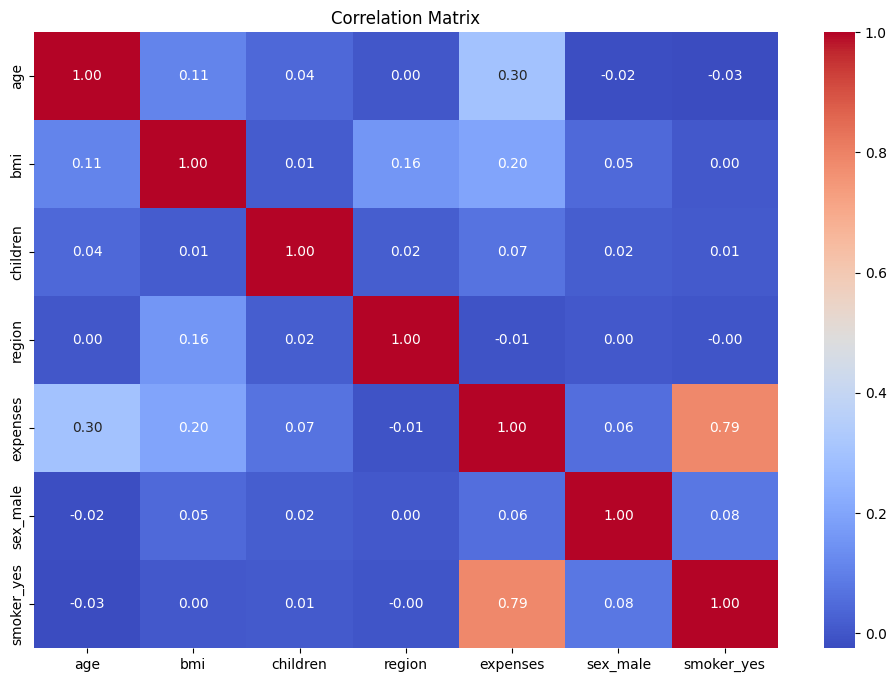

               age          bmi     children       region      expenses  \
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000   
mean     39.207025    30.665471     1.094918     1.515695  13270.422414   
std      14.049960     6.098382     1.205493     1.104885  12110.011240   
min      18.000000    16.000000     0.000000     0.000000   1121.870000   
25%      27.000000    26.300000     0.000000     1.000000   4740.287500   
50%      39.000000    30.400000     1.000000     2.000000   9382.030000   
75%      51.000000    34.700000     2.000000     2.000000  16639.915000   
max      64.000000    53.100000     5.000000     3.000000  63770.430000   

          sex_male   smoker_yes  
count  1338.000000  1338.000000  
mean      0.505232     0.204783  
std       0.500160     0.403694  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000  
   age   bmi  chil

In [3]:

# Load data
data = pd.read_csv('../data/health-insurance.csv')

# Identify categorical features
categorical_features = ['sex', 'region', 'smoker']

# One-Hot Encoding for binary categorical features
data = pd.get_dummies(data, columns=['sex', 'smoker'], drop_first=True)
print(data)
# Convert bool to int64
data['sex_male'] = data['sex_male'].astype('int64')
data['smoker_yes'] = data['smoker_yes'].astype('int64')

# Label Encoding for ordinal relationship
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])

# Visualize correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(data.describe())

encoded_df = pd.DataFrame(data)
print(encoded_df.head())

# Check the datatypes to ensure proper encoding
print(encoded_df.dtypes)


### Feature Engineering

In [4]:
encoded_df.head()

encoded_df.to_csv('../data/encoded-data.csv', index=False)


# # Identify numerical features for standardization and normalization
# standardize_features = ['Age']
# normalize_features = ['Region_Code', 'Vintage', 'Policy_Sales_Channel']

# # Apply Standardization
# scaler_standard = StandardScaler()
# df[standardize_features] = scaler_standard.fit_transform(data[standardize_features])

# # Apply Normalization
# scaler_normal = MinMaxScaler()
# df[normalize_features] = scaler_normal.fit_transform(data[normalize_features])

# # Check the transformed data
# print(df.describe())

# df.head()

### Model development, tuning, and evaluation

Cross-Validation Performance metrics
CV RMSE: 4709.407213039378
CV R^2: 0.8412042939941144
CV Explained Variance Score: 0.8417456930873536
CV MAPE: 29.741934044158597%
Performance metrics
RMSE: 4338.599722335597
R^2: 0.8787529720934828
Explained Variance Score: 0.8792486242487159
MAPE: 27.76867720405522%


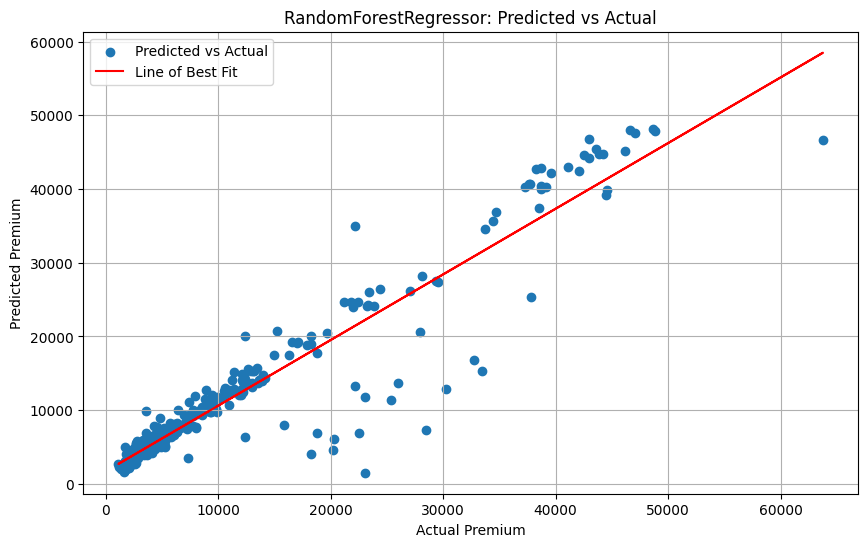

In [5]:
# Define features and target variable
X = encoded_df.drop(columns=['expenses'])
y = encoded_df['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection after comparing common regression models, params selected after GridSearchCV
model = RandomForestRegressor(max_depth = None, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 600)

model.fit(X_train, y_train)

pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
evs = explained_variance_score(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred) * 100

# Evaluate model using cross-validation
cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_evs = cross_val_score(model, X_train, y_train, cv=5, scoring='explained_variance')
cv_mape = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

print('Cross-Validation Performance metrics')
print(f'CV RMSE: {cv_rmse.mean()}')
print(f'CV R^2: {cv_r2.mean()}')
print(f'CV Explained Variance Score: {cv_evs.mean()}')
print(f'CV MAPE: {-cv_mape.mean() * 100}%')

print('Performance metrics')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'Explained Variance Score: {evs}')
print(f'MAPE: {mape}%')

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, label='Predicted vs Actual')
m, b = np.polyfit(y_test, pred, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Line of Best Fit')

plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title(f'{model.__class__.__name__}: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

### Final results and deliverables